In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset from a CSV file into a DataFrame
df = pd.read_csv("Assignment - Junior Data Analyst.csv")

In [42]:
# Display the first few rows of the DataFrame to get an overview of the data
df.head()

,camera,display,memory,name,price,processor,rating,warranty,reviews_numeric,battery_numeric,Ram,Rom,Expendable,Back camera,Front camera,number of back camera,Primary Back camera,screen size,screen type
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,Brand Warranty of 1 Year Available for Mobile ...,55078.0,5000.0,4.0,64.0,512.0,12MP + 2MP,8.0,2.0,12.0,15.80,HD+ Display
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,64.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,128.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,128.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,Dual Nano SIM slots and Memory Card Slot,10091.0,4000.0,3.0,32.0,256.0,13MP + 2MP,5.0,2.0,13.0,15.49,HD+ Display


#Univariate analysis of all the 10 columns

In [4]:
# Output the dimensions of the DataFrame to understand its size
df.shape

(984, 10)

In [5]:
# Remove duplicate rows from the DataFrame to ensure each record is unique
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(960, 10)

In [7]:
# Check for missing values in the DataFrame and get the count of missing values for each column
df.isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,1
rating,12
reviews,12
warranty,145


In [8]:
# Provide a concise summary of the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 960 entries, 0 to 983
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   battery    960 non-null    object 
 1   camera     960 non-null    object 
 2   display    960 non-null    object 
 3   memory     960 non-null    object 
 4   name       960 non-null    object 
 5   price      960 non-null    int64  
 6   processor  959 non-null    object 
 7   rating     948 non-null    float64
 8   reviews    948 non-null    object 
 9   warranty   815 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 82.5+ KB


In [9]:
# Iterate through each column in the DataFrame to compute and print statistical summaries
for i in df.columns:
  if df[i].dtype == object:
      # Print the mode value for categorical columns
    print(f'\nMode value of column {i} : {df[i].mode()[0]}\n')
  else:
     # Print the mean and median values for numerical columns, rounded to two decimal places
    print(f'\nMean value and median value of column {i} : {round(df[i].mean(),2)} and {round(df[i].median(),2)} \n')


Mode value of column battery : 4000 mAh Battery


Mode value of column camera : 13MP Rear Camera | 5MP Front Camera


Mode value of column display : 16.0 cm (6.3 inch) Full HD+ Display


Mode value of column memory : 4 GB RAM | 64 GB ROM | Expandable Upto 256 GB


Mode value of column name : Asus ZenFone Max Pro M2 (Blue, 64 GB)


Mean value and median value of column price : 15568.02 and 11999.0 


Mode value of column processor : Qualcomm Snapdragon 730G Processor


Mean value and median value of column rating : 4.24 and 4.3 


Mode value of column reviews : 3 Reviews


Mode value of column warranty : Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories



In [10]:
df[df['warranty'].isna()].head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
229,4000 mAh Battery,48MP + 8MP | 13MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,3 GB RAM | 32 GB ROM,"Redmi Note 8 (Neptune Blue, 32 GB)",10978,1 year manufacturer warranty for device and 6 ...,4.4,17 Reviews,NaN
232,4000 mAh Battery,48MP + 8MP | 13MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,6 GB RAM | 128 GB ROM,"Redmi Note 8 (Neptune Blue, 128 GB)",13261,1 year manufacturer warranty for device and 6 ...,4.4,942 Reviews,NaN
239,4000 mAh Battery,48MP Rear Camera | 13MP Front Camera,16.0 cm (6.3 inch) Display,6 GB RAM | 128 GB ROM,"Redmi Note 8 (Cosmic Purple, 128 GB)",13499,1 year,4.4,942 Reviews,NaN
247,4000 mAh Battery,48MP + 8MP | 13MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,6 GB RAM | 128 GB ROM,"Redmi Note 8 (Moonlight White, 128 GB)",13159,1 year manufacturer warranty for device and 6 ...,4.4,942 Reviews,NaN
248,4000 mAh Battery,48MP + 8MP | 13MP Front Camera,16.0 cm (6.3 inch) Full HD+ Display,4 GB RAM | 64 GB ROM,"Redmi Note 8 (Moonlight White, 64 GB)",11199,1 year manufacturer warranty for device and 6 ...,4.4,"1,243 Reviews",NaN


In [11]:
df[df['warranty'].isna()].isnull().sum()

,0
battery,0
camera,0
display,0
memory,0
name,0
price,0
processor,1
rating,4
reviews,4
warranty,145


In [12]:
df[df['reviews'].isna()].head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
356,5020 mAh Battery,48MP Rear Camera,16.51 cm (6.5 inch) Display,4 GB RAM | 64 GB ROM,"Redmi Note 9 (Green, 64 GB)",14999,1 Year Manufacturer Warranty,NaN,NaN,NaN
443,4500 mAh Lithium-ion Battery,108MP + 12MP + 12MP | 10MP Front Camera,17.53 cm (6.9 inch) Quad HD+ Display,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,Samsung Galaxy Note 20 Ultra 5G (Mystic Bronze...,104999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
502,4500 mAh Lithium-ion Battery,108MP + 12MP + 12MP | 10MP Front Camera,17.53 cm (6.9 inch) Quad HD+ Display,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,"Samsung Galaxy Note 20 Ultra 5G (Mystic Black,...",104999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
503,4300 mAh Lithium-ion Battery,64MP + 12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,8 GB RAM | 256 GB ROM,"Samsung Galaxy Note 20 (Mystic Bronze, 256 GB)",77999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
623,3500 mAh Battery,16MP Rear Camera,16.26 cm (6.4 inch) Display,8 GB RAM | 128 GB ROM,"OPPO R17 (Ambient Blue, 128 GB)",22999,1 year manufacturer warranty,NaN,NaN,NaN


In [13]:
df[df['rating'].isna()].head()

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
356,5020 mAh Battery,48MP Rear Camera,16.51 cm (6.5 inch) Display,4 GB RAM | 64 GB ROM,"Redmi Note 9 (Green, 64 GB)",14999,1 Year Manufacturer Warranty,NaN,NaN,NaN
443,4500 mAh Lithium-ion Battery,108MP + 12MP + 12MP | 10MP Front Camera,17.53 cm (6.9 inch) Quad HD+ Display,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,Samsung Galaxy Note 20 Ultra 5G (Mystic Bronze...,104999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
502,4500 mAh Lithium-ion Battery,108MP + 12MP + 12MP | 10MP Front Camera,17.53 cm (6.9 inch) Quad HD+ Display,12 GB RAM | 256 GB ROM | Expandable Upto 1 TB,"Samsung Galaxy Note 20 Ultra 5G (Mystic Black,...",104999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
503,4300 mAh Lithium-ion Battery,64MP + 12MP + 12MP | 10MP Front Camera,17.02 cm (6.7 inch) Full HD+ Display,8 GB RAM | 256 GB ROM,"Samsung Galaxy Note 20 (Mystic Bronze, 256 GB)",77999,Exynos Octa Core Processor,NaN,NaN,1 Year Warranty Provided by the Manufacturer f...
623,3500 mAh Battery,16MP Rear Camera,16.26 cm (6.4 inch) Display,8 GB RAM | 128 GB ROM,"OPPO R17 (Ambient Blue, 128 GB)",22999,1 year manufacturer warranty,NaN,NaN,NaN


In [14]:
df[df['processor'].isna()]

,battery,camera,display,memory,name,price,processor,rating,reviews,warranty
825,5000 mAh Battery,16MP Rear Camera,16.59 cm (6.53 inch) Display,6 GB RAM | 64 GB ROM,"Vivo U20 (Racing Black, 64 GB)",11998,NaN,4.1,33 Reviews,NaN


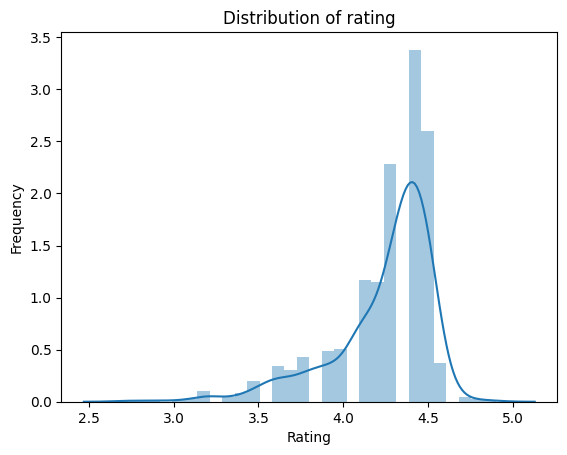

In [15]:
# Plot the distribution of the 'rating' column with a histogram and kernel density estimate (KDE)
sns.distplot(df['rating'], kde=True, bins=30)
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

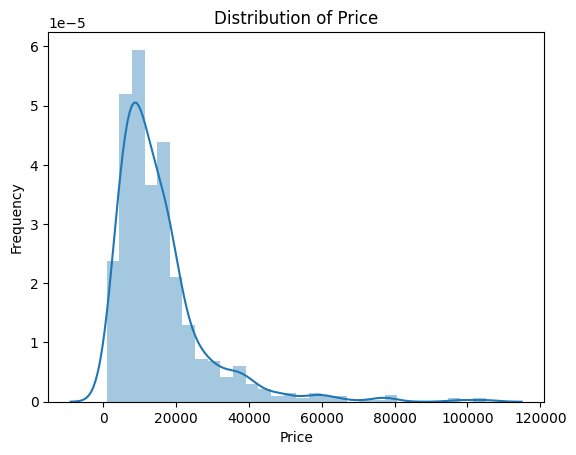

In [16]:
# Plot the distribution of the 'price' column with a histogram and kernel density estimate (KDE)
sns.distplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
df.describe()

,price,rating
count,960.000000,948.000000
mean,15568.025000,4.238924
std,13000.303723,0.301026
min,887.000000,2.700000
25%,7499.000000,4.100000
50%,11999.000000,4.300000
75%,18499.000000,4.400000
max,104999.000000,4.900000


In [18]:
# Convert reviews to numeric
df['reviews_numeric'] = df['reviews'].str.replace(' Reviews', '').str.replace(',', '').astype(float)
df['battery_numeric'] = df['battery'].apply(lambda x: x.split()[0]).astype(float)

df.drop(columns = ['reviews','battery'], inplace=True, axis=1)

In [19]:
# Function to print unique values and their counts for each column
def print_unique_counts(df):
    for column in df.columns:
        print(f"Unique values for '{column}':")
        unique_counts = df[column].value_counts()
        for value, count in unique_counts.items():
            print(f"{value}: {count}")
        print()

# Call the function
print_unique_counts(df)


Unique values for 'camera':
13MP Rear Camera | 5MP Front Camera: 52
8MP Rear Camera | 5MP Front Camera: 46
13MP + 2MP | 8MP Front Camera: 37
13MP Rear Camera | 8MP Front Camera: 32
13MP Rear Camera: 23
13MP + 2MP | 5MP Front Camera: 20
48MP + 8MP + 2MP + 2MP | 16MP Front Camera: 19
13MP + 2MP | 13MP Front Camera: 17
48MP + 5MP | 16MP Front Camera: 16
5MP Rear Camera | 2MP Front Camera: 16
5MP Rear Camera | 5MP Front Camera: 15
8MP Rear Camera: 14
48MP Rear Camera: 13
12MP Rear Camera | 8MP Front Camera: 12
48MP + 5MP | 13MP Front Camera: 12
48MP + 13MP + 8MP | 20MP Front Camera: 12
48MP + 8MP + 2MP + 2MP | 13MP Front Camera: 12
48MP + 8MP + 2MP | 32MP Front Camera: 12
5MP Rear Camera | 0.3MP Front Camera: 11
64MP + 8MP + 2MP + 2MP | 32MP Front Camera: 11
5MP Rear Camera: 11
12MP + 5MP | 20MP Front Camera: 11
13MP Rear Camera | 13MP Front Camera: 11
16MP Rear Camera: 11
64MP + 12MP + 8MP + 2MP | 16MP + 8MP Dual Front Camera: 11
48MP + 8MP + 5MP + 2MP | 16MP Front Camera: 11
13MP + 2MP |

# Bivariate analysis - most important parameters that impact the price and ratings

In [20]:
# Correlation Analysis between numeric parameters

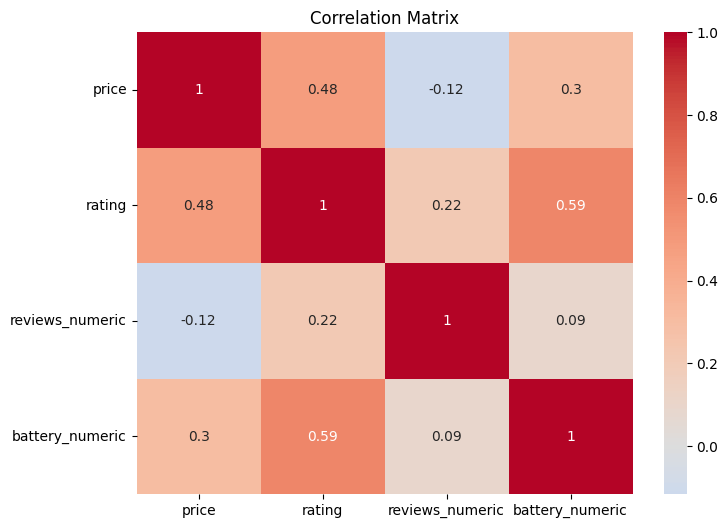

In [21]:
# Compute correlations
correlation_matrix = df[['price', 'rating', 'reviews_numeric', 'battery_numeric']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Feature Importance for all the parameters.

In [23]:
df.head()

,camera,display,memory,name,price,processor,rating,warranty,reviews_numeric,battery_numeric
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,Brand Warranty of 1 Year Available for Mobile ...,55078.0,5000.0
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,Sunrise Design,20062.0,5000.0
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,Dual Nano SIM slots and Memory Card Slot,10091.0,4000.0


In [24]:
df["warranty2"] = df["warranty"]

In [25]:
df.loc[df['warranty'].isna(), 'warranty'] = df['processor']

In [26]:
df.loc[df['warranty2'].isna(), 'processor'] = df['warranty2']

In [27]:
df.drop(columns = ["warranty2"],inplace=True)

In [28]:
df.isnull().sum()

,0
camera,0
display,0
memory,0
name,0
price,0
processor,145
rating,12
warranty,1
reviews_numeric,12
battery_numeric,0


In [29]:
# Fill missing values in columns

df["processor"] = df["processor"].fillna(df["processor"].mode()[0])
df["rating"] = df["rating"].fillna(df["rating"].median())
df["reviews_numeric"] = df["reviews_numeric"].fillna(df["reviews_numeric"].median())

In [30]:
df.isnull().sum()

,0
camera,0
display,0
memory,0
name,0
price,0
processor,0
rating,0
warranty,1
reviews_numeric,0
battery_numeric,0


In [31]:
df.dropna(inplace=True)

In [32]:
# prepare input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(df[['camera', 'display', 'memory', 'processor','warranty']])
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

X = df[['battery_numeric', 'camera', 'display', 'memory', 'processor', 'reviews_numeric','warranty']]
y_price = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.33, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train[['camera', 'display', 'memory', 'processor','warranty']],
                                         X_test[['camera', 'display', 'memory', 'processor','warranty']])

X_train_enc = np.hstack((X_train_enc, X_train['battery_numeric'].values.reshape(-1, 1)))
X_train_enc = np.hstack((X_train_enc, X_train['reviews_numeric'].values.reshape(-1, 1)))
X_test_enc = np.hstack((X_test_enc, X_test['battery_numeric'].values.reshape(-1, 1)))
X_test_enc = np.hstack((X_test_enc, X_test['reviews_numeric'].values.reshape(-1, 1)))

# Train model
model_price = RandomForestRegressor(n_estimators=100, random_state=42)
model_price.fit(X_train_enc, y_train.values)
importances_price = model_price.feature_importances_

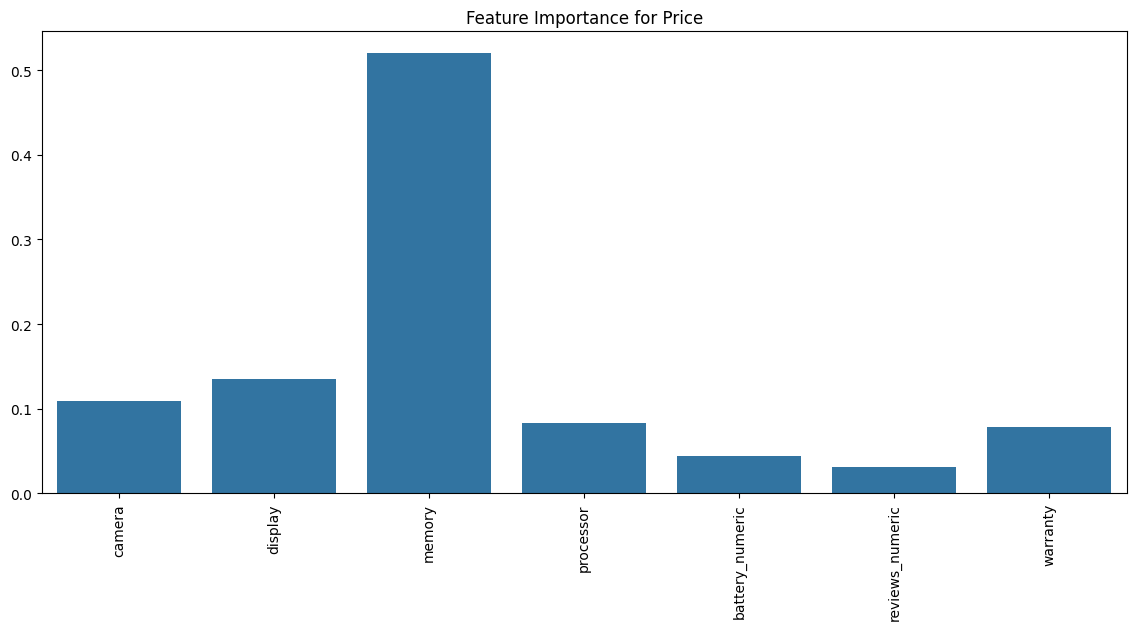

In [34]:
# Plot feature importances
plt.figure(figsize=(14, 6))

sns.barplot(x=['camera', 'display', 'memory', 'processor', 'battery_numeric', 'reviews_numeric','warranty'], y=importances_price)
plt.title('Feature Importance for Price')
plt.xticks(rotation=90)

plt.show()


# Predict rating based on all other existing columns

### Feature engineering

In [35]:
df.head()

,camera,display,memory,name,price,processor,rating,warranty,reviews_numeric,battery_numeric
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,Brand Warranty of 1 Year Available for Mobile ...,55078.0,5000.0
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,Sunrise Design,20062.0,5000.0
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,Dual Nano SIM slots and Memory Card Slot,10091.0,4000.0


In [36]:
df[['Ram','Rom','Expendable']]=df['memory'].str.split("|", expand=True)
df['Ram'] = df['Ram'].apply(lambda x: x.split(" ")[0]).astype(float)
df['Rom'] = df['Rom'].apply(lambda x: x.split(" ")[1]).astype(float)
df['Expendable'] = df['Expendable'].apply(lambda x: x.lstrip().split(" ")[2] if x else 0).astype(float)

df[['Back camera','Front camera']]=df['camera'].str.split("|", expand=True)
df["number of back camera"] = df['camera'].apply(lambda x: x.count("+")+1).astype(float)
df['Front camera'] = df['Front camera'].str.lstrip().fillna("0").apply(lambda x: x.split(" ")[0].split("MP")[0]).astype(float)
df['Primary Back camera'] = df['Back camera'].str.lstrip().fillna("0").apply(lambda x: x.split(" ")[0].split("MP")[0]).astype(float)

df['screen size'] = df['display'].apply(lambda x :x.split(" ")[0]).astype(float)
df['screen type'] = df['display'].apply(lambda x :x.split(") ")[1])

df.head()

,camera,display,memory,name,price,processor,rating,warranty,reviews_numeric,battery_numeric,Ram,Rom,Expendable,Back camera,Front camera,number of back camera,Primary Back camera,screen size,screen type
0,12MP + 2MP | 8MP Front Camera,15.8 cm (6.22 inch) HD+ Display,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,"Redmi 8 (Ruby Red, 64 GB)",9999,Qualcomm Snapdragon 439 Processor,4.4,Brand Warranty of 1 Year Available for Mobile ...,55078.0,5000.0,4.0,64.0,512.0,12MP + 2MP,8.0,2.0,12.0,15.80,HD+ Display
1,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 64 GB ROM,"Realme 5i (Aqua Blue, 64 GB)",10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,64.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
2,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Aqua Blue, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,128.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
3,12MP + 8MP + 2MP + 2MP | 8MP Front Camera,16.56 cm (6.52 inch) HD+ Display,4 GB RAM | 128 GB ROM,"Realme 5i (Forest Green, 128 GB)",11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,Sunrise Design,20062.0,5000.0,4.0,128.0,0.0,12MP + 8MP + 2MP + 2MP,8.0,4.0,12.0,16.56,HD+ Display
4,13MP + 2MP | 5MP Front Camera,15.49 cm (6.1 inch) HD+ Display,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,"Realme C2 (Diamond Blue, 32 GB)",7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,Dual Nano SIM slots and Memory Card Slot,10091.0,4000.0,3.0,32.0,256.0,13MP + 2MP,5.0,2.0,13.0,15.49,HD+ Display


### Creating df for model

In [37]:
df.columns

Index(['camera', 'display', 'memory', 'name', 'price', 'processor', 'rating',
       'warranty', 'reviews_numeric', 'battery_numeric', 'Ram', 'Rom',
       'Expendable', 'Back camera', 'Front camera', 'number of back camera',
       'Primary Back camera', 'screen size', 'screen type'],
      dtype='object')

In [38]:
model_for_df = df[['price','processor','rating', 'reviews_numeric', 'battery_numeric', 'Ram', 'Rom',
       'Expendable','Front camera', 'number of back camera',
       'Primary Back camera', 'screen size', 'screen type','warranty']]
model_for_df.head()

,price,processor,rating,reviews_numeric,battery_numeric,Ram,Rom,Expendable,Front camera,number of back camera,Primary Back camera,screen size,screen type,warranty
0,9999,Qualcomm Snapdragon 439 Processor,4.4,55078.0,5000.0,4.0,64.0,512.0,8.0,2.0,12.0,15.80,HD+ Display,Brand Warranty of 1 Year Available for Mobile ...
1,10999,Qualcomm Snapdragon 665 2 GHz Processor,4.5,20062.0,5000.0,4.0,64.0,0.0,8.0,4.0,12.0,16.56,HD+ Display,Sunrise Design
2,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062.0,5000.0,4.0,128.0,0.0,8.0,4.0,12.0,16.56,HD+ Display,Sunrise Design
3,11999,Qualcomm Snapdragon 665 (2 GHz) Processor,4.5,20062.0,5000.0,4.0,128.0,0.0,8.0,4.0,12.0,16.56,HD+ Display,Sunrise Design
4,7499,MediaTek P22 Octa Core 2.0 GHz Processor,4.4,10091.0,4000.0,3.0,32.0,256.0,5.0,2.0,13.0,15.49,HD+ Display,Dual Nano SIM slots and Memory Card Slot


In [39]:
import pandas as pd
from sklearn.metrics import mean_squared_error

model_df = pd.get_dummies(model_for_df, columns=['processor', 'screen type','warranty'], drop_first=True)

# Split data into features and target
X = model_df.drop('rating', axis=1)
y = model_df['rating']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f'Predictions: {predictions}')


Mean Squared Error: 0.024167010416666662
Predictions: [4.044 4.33  3.45  3.868 4.173 4.296 4.389 4.011 4.398 4.321 4.427 4.324
 4.424 3.715 4.4   3.94  4.391 4.379 3.809 4.339 4.424 4.297 4.043 4.521
 4.399 4.428 4.398 4.467 4.478 4.301 3.712 4.5   4.421 4.405 4.025 4.298
 4.493 4.349 4.401 4.48  4.318 4.404 4.311 4.315 4.131 3.501 4.389 4.441
 3.908 4.388 4.443 4.521 4.589 4.402 3.781 4.497 4.447 4.372 3.968 4.296
 4.592 4.498 3.819 4.507 4.39  4.414 4.5   4.502 4.167 4.345 3.989 3.56
 4.44  4.555 4.274 4.109 4.402 4.291 4.32  4.456 4.487 3.989 4.295 4.367
 3.567 3.998 4.257 3.92  4.283 3.989 4.498 4.218 4.512 4.178 4.341 4.17
 4.467 4.299 4.297 4.482 4.294 4.349 4.398 4.089 4.305 4.318 3.443 4.372
 4.627 4.295 4.501 4.424 3.783 3.812 4.399 4.08  4.227 4.207 3.869 4.005
 4.388 4.138 4.391 4.487 3.837 4.082 3.733 4.324 4.005 4.293 3.514 4.192
 4.364 4.49  4.496 4.484 4.5   4.179 3.717 4.484 4.46  3.997 4.441 4.474
 4.336 4.299 4.401 3.968 4.441 4.277 4.379 3.904 4.02  4.282 4.318 4.369

In [40]:
from sklearn.metrics import mean_absolute_error

# Assuming y_test are the true values and predictions are the predicted values
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.07333333333333315


Clustering of phones


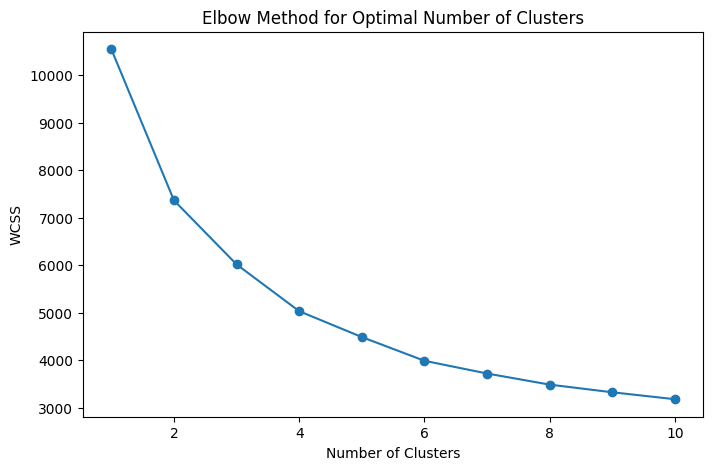

,price,processor,rating,reviews_numeric,battery_numeric,Ram,Rom,Expendable,Front camera,number of back camera,Primary Back camera,screen size,screen type,warranty,cluster
0,9999,159,4.4,55078.0,5000.0,4.0,64.0,512.0,8.0,2.0,12.0,15.80,7,73,3
1,10999,179,4.5,20062.0,5000.0,4.0,64.0,0.0,8.0,4.0,12.0,16.56,7,108,3
2,11999,177,4.5,20062.0,5000.0,4.0,128.0,0.0,8.0,4.0,12.0,16.56,7,108,3
3,11999,177,4.5,20062.0,5000.0,4.0,128.0,0.0,8.0,4.0,12.0,16.56,7,108,3
4,7499,112,4.4,10091.0,4000.0,3.0,32.0,256.0,5.0,2.0,13.0,15.49,7,91,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,3590,195,3.8,105.0,2000.0,1.0,8.0,32.0,2.0,1.0,5.0,12.70,1,45,0
980,19999,198,4.0,516.0,2680.0,3.0,32.0,0.0,5.0,1.0,13.0,13.21,3,68,0
981,10499,39,4.1,710.0,4550.0,4.0,64.0,256.0,20.0,2.0,13.0,15.24,3,73,3
982,8990,72,3.8,81.0,2100.0,1.0,8.0,32.0,2.0,1.0,8.0,12.70,6,8,0


In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Convert categorical columns to numerical
model_for_df['processor'] = model_for_df['processor'].astype('category').cat.codes
model_for_df['screen type'] = model_for_df['screen type'].astype('category').cat.codes
model_for_df['warranty'] = model_for_df['warranty'].astype('category').cat.codes

# Drop any non-numeric columns if they exist, for example, if there is a 'description' column
model_for_df_numeric = model_for_df.select_dtypes(include=[float, int])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(model_for_df_numeric)

# Determine the optimal number of clusters using the elbow method
wcss = []
for n_clusters in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
model_for_df['cluster'] = kmeans.fit_predict(scaled_data)

model_for_df